In [1]:
import pandas as pd
customers = pd.read_csv('Mall_Customers.csv', header=0,
                        names=['id', 'gender', 'age', 'annual_income', 'spending_score'],
                        index_col='id')
customers

,gender,age,annual_income,spending_score
id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [3]:
customers.drop(labels='gender', axis=1).agg(['mean', 'min', 'max'])

,age,annual_income,spending_score
mean,38.85,60.56,50.2
min,18.00,15.00,1.0
max,70.00,137.00,99.0


In [4]:
customers['gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: xlabel='gender'>

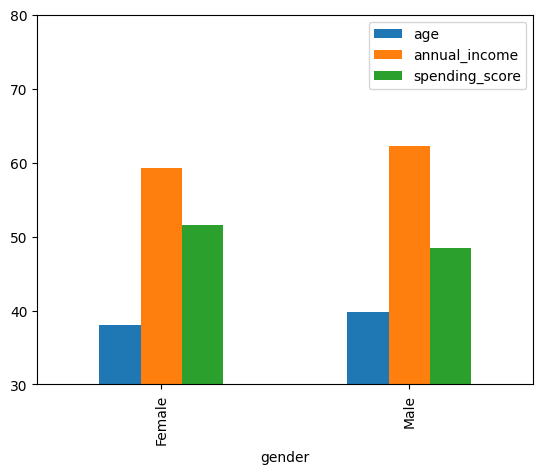

In [5]:
customers.groupby('gender').mean().plot.bar(ylim=(30, 80))

gender
Female    112
Male       88
Name: count, dtype: int64


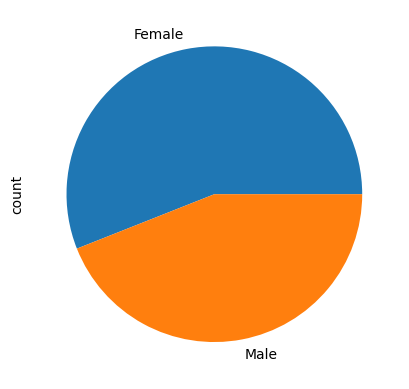

In [6]:
counts = customers['gender'].value_counts()
counts.plot.pie()
print(counts)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

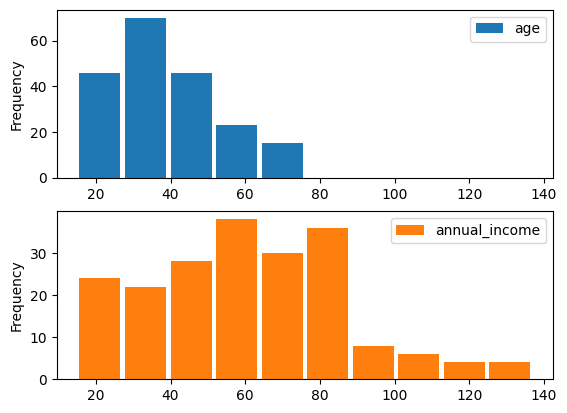

In [7]:
customers[['age', 'annual_income']].plot.hist(subplots=True, rwidth=0.9, sharex=False)

In [8]:
from sklearn.cluster import KMeans

num_cols = ['age', 'annual_income', 'spending_score']
X = customers[num_cols]
kmeans = KMeans()
kmeans.fit(X)

c:\Users\Ayub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from bokeh.palettes import Category10
from bokeh.plotting import figure, show

# Convert categorical variables to numerical using one-hot encoding
customers_encoded = pd.get_dummies(customers, columns=['gender'])

# Extract numerical features for clustering
features = customers_encoded[['age', 'annual_income', 'spending_score']]

# Create a new column containing each customer's assigned segment
kmeans = KMeans(n_clusters=3)  # Set the desired number of clusters
customers_encoded['category'] = kmeans.fit_predict(features)

# Get the segment labels and sort them for easier visual processing in the plot
segments = customers_encoded['category'].unique()
segments.sort()

# Gather x and y data
age = customers_encoded['age']
income = customers_encoded['annual_income']
spend = customers_encoded['spending_score']

# Determine the number of colors needed
num_colors = min(len(segments), len(Category10))

# Get a subset of the cyclic palette based on the number of colors needed
palette = Category10[num_colors]

# Create the scatter plot
segments_fig = figure(title='Customer Segments | Age vs. Annual Income', x_axis_label='Age', y_axis_label='Annual Income')

for i, segment in enumerate(segments):
    # Get the positions of the customers in this segment
    indices = customers_encoded['category'] == segment
    segments_fig.scatter(age[indices], income[indices], color=palette[i % num_colors], legend_label='Segment ' + str(segment))

show(segments_fig)


c:\Users\Ayub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
